ENCODER:

In [ ]:
from tensorflow.keras import layers, models
from tensorflow.keras import backend as K


encoder_input = layers.Input(shape=(32, 32, 1), name = "encoder_input")
x = layers.Conv2D(filters=32, kernel_size=(3,3), strides = 2, activation='relu', padding="same")(encoder_input)
x = layers.Conv2D(filters=64, kernel_size=(3,3), strides = 2, activation='relu', padding="same")(x)
x = layers.Conv2D(filters=128, kernel_size=(3,3), strides = 2, activation='relu', padding="same")(x)
shape_before_flattening = K.int_shape(x)[1:]
x = layers.Flatten()(x)\

encoder_output = layers.Dense(2, name="encoder_output")(x)
encoder = models.Model(encoder_input, encoder_output)

In [ ]:
encoder.summary()

Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ encoder_input (InputLayer)           │ (None, 32, 32, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 16, 16, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 8, 8, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ encoder_output (Dense)               │ (None, 2)                   │           4,098 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 96,770 (378.01 KB)

 Trainable params: 96,770 (378.01 KB)

 Non-trainable params: 0 (0.00 B)

DECODER

In [ ]:
import numpy as np
decoder_input = layers. Input(shape=(2,), name="decoder _input")
x=layers.Dense(np.prod(shape_before_flattening))(decoder_input)
x=layers.Reshape(shape_before_flattening)(x)
x=layers.Conv2DTranspose(filters=128, kernel_size=(3,3), strides = 2, activation='relu', padding="same")(x)
x=layers.Conv2DTranspose(filters=64, kernel_size=(3,3), strides = 2, activation='relu', padding="same")(x)
X=layers.Conv2DTranspose(filters=32, kernel_size=(3,3), strides = 2, activation='relu', padding="same")(x)
decoder_output = layers.Conv2D(filters=1, kernel_size=(3,3), strides = 1, activation='sigmoid', padding="same", name="decoder_input")(x)
decoder = models.Model(decoder_input, decoder_output)
decoder.summary()


Model: "functional_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ decoder _input (InputLayer)          │ (None, 2)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 2048)                │           6,144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_10 (Reshape)                 │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_30                  │ (None, 8, 8, 128)           │         147,584 │
│ (Conv2DTranspose)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_31                  │ (None, 16, 16, 64)          │          73,792 │
│ (Conv2DTranspose)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ decoder_input (Conv2D)               │ (None, 16, 16, 1)           │             577 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 228,097 (891.00 KB)

 Trainable params: 228,097 (891.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import numpy as np
decoder_input = layers. Input (shape=(2,), name = "decoder _input")
x = layers.Dense(np.prod(shape_before_flattening))(decoder_input)
x = layers.Reshape(shape_before_flattening)(x)
x = layers.Conv2DTranspose(filters=128, kernel_size=(3, 3), strides = 2, activation = 'relu', padding="same")(x)
x = layers. Conv2DTranspose(filters=64,kernel_size=(3, 3), strides = 2, activation = 'relu', padding="same") (x)
x = layers.Conv2DTranspose(filters=32, kernel_size=(3, 3), strides = 2, activation = 'relu', padding="same") (x)
decoder_output = layers.Conv2D(filters=1, kernel_size=(3, 3), strides = 1, activation = 'sigmoid', padding="same", name="decoder_input")(x)
decoder = models.Model (decoder_input, decoder_output)
decoder.summary()

Model: "functional_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ decoder _input (InputLayer)          │ (None, 2)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 2048)                │           6,144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_11 (Reshape)                 │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_33                  │ (None, 8, 8, 128)           │         147,584 │
│ (Conv2DTranspose)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_34                  │ (None, 16, 16, 64)          │          73,792 │
│ (Conv2DTranspose)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_35                  │ (None, 32, 32, 32)          │          18,464 │
│ (Conv2DTranspose)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ decoder_input (Conv2D)               │ (None, 32, 32, 1)           │             289 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 246,273 (962.00 KB)

 Trainable params: 246,273 (962.00 KB)

 Non-trainable params: 0 (0.00 B)

MERGING ENCODER AND DCODER MEANS AUTOENCODER

In [ ]:
autoencoder=models.Model(encoder_input, decoder(encoder_output))
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


TRAINING THE MODEL

In [ ]:
import numpy as np
from tensorflow.keras import datasets
import matplotlib.pyplot as plt

(x_train,y_train), (x_test,y_test) = datasets.fashion_mnist.load_data()
def preprocess(img):
  imgs=img.astype("float32")/255.0
  imgs=np.pad(imgs, ((0,0), (2,2), (2,2)), constant_values=0.0)
  imgs=np.expand_dims(imgs, -1)
  return imgs
x_train=preprocess(x_train)
x_test=preprocess(x_test)

In [ ]:
autoencoder.fit(x_train,x_train,epochs=2,batch_size=100,shuffle=True,validation_data=(x_test,x_test))

Epoch 1/2
600/600 ━━━━━━━━━━━━━━━━━━━━ 205s 337ms/step - loss: 0.3549 - val_loss: 0.2600
Epoch 2/2
600/600 ━━━━━━━━━━━━━━━━━━━━ 263s 340ms/step - loss: 0.2573 - val_loss: 0.2548


MAKING PREDICTION

In [ ]:
example_images = x_test[:5000]
prediction=autoencoder.predict(example_images)
prediction.shape

157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step


(5000, 32, 32, 1)

In [ ]:
color_values=y_test[:5000]

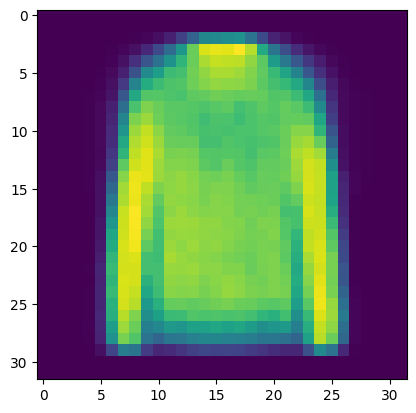

In [ ]:
plt.imshow(prediction[10])

In [ ]:
embeddings=encoder.predict(example_images)
embeddings.shape

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


(5000, 2)

Mapping the low dimensional latent space

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


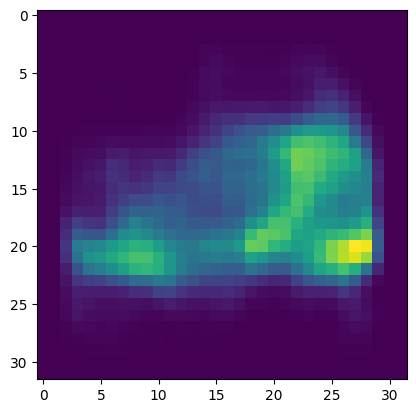

In [ ]:
mins, maxs = np.min(embeddings, axis=0), np.max(embeddings, axis=0)
sample = np.random.uniform(mins, maxs, size=(1, 2))
reconstructions = decoder.predict(sample)
plt.imshow(reconstructions[0, :, :,:])